# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Business Goal
The goal is to model the demand for shared bikes using available independent variables. This model will help the management understand how demand varies with different features and adjust their business strategy accordingly. It will also provide insights into the demand dynamics of a new market.

In [93]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for importing in Google collab
import io

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Data Description and Preparation

In [94]:
# Read the data from csv file
from google.colab import files
uploaded = files.upload()


Saving day.csv to day (1).csv


In [95]:
df = pd.read_csv(io.BytesIO(uploaded['day.csv']))

#looking at dataset head
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [96]:
# Checking shape of dataset
df.shape

(730, 16)

In [97]:
# Describing the columns of dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [98]:
# Checking dataset for null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Observations

1. The dataset contains 730 rows and 16 columns
2. One column is date type
3. All others are floats and integers




In [99]:
# Checking for null and missing values in columns
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [100]:
# Checking for null and missing values in rows
round((df.isnull().sum(axis=1)/len(df))*100,2).sort_values(ascending=False)


0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [101]:
# There are no null or missing values in dataset 

# Making copy of dataset to compare
dup_df = df.copy()

# Looking for duplicates and, if found, removing the entire duplicate row
dup_df.drop_duplicates(subset=None, inplace=True)

In [102]:
dup_df.shape

(730, 16)

In [103]:
# Verifying shape of original dataset
df.shape

(730, 16)

### Observation
The shape is same in both df and dup_df datasets. Therefore, there were no duplicate values.

## Data Cleaning


1. The 'instant' variable serves as a unique identifier for each row in the dataset.
2. The 'dteday' variable is excluded from the analysis because other columns already provide information about the month, year, and weekday. Additionally, the focus of this analysis is not on capturing the day-to-day demand trend for bikes.
3. The 'casual' and 'registered' variables cannot be used for prediction as they seems to be the breakup by category for cnt column.



In [104]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [105]:
# Performing encoding or mapping for the 'season' column

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [106]:
# Performing encoding or mapping for the 'month' column

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [107]:
# Performing encoding or mapping for the 'month' column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [108]:
# Checking the head of the dataset
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [109]:
# Verifying the column info of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### Creating Dummy Variables
We will convert the categorical variables 'mnth', 'weekday', 'season', and 'weathersit' into 'category' data types and then create dummy variables for them.

In [110]:
df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [112]:
# The following code will creates dummy variables and drops the original variable for which the dummy variable was created.
# It will also drops the first dummy variable within each set of created dummies.
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  mnth_aug                   730 non-null    uint8  
 12  mnth_dec                   730 non-null    uint8  
 13  mnth_feb                   730 non-null    uint8  

In [113]:
df.shape


(730, 30)

## Data Splitting into Train and Test


1. We will proceed by dividing the data into two sets, namely TRAIN and TEST, using a ratio of 70:30.
2. To accomplish this, we will utilize the train_test_split method from the sklearn package.



In [114]:
# To ensure consistency, it is recommended to include the 'random_state' parameter when splitting the data into train and test sets.
# This parameter guarantees that the train and test sets will always contain the same rows.

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 42)

In [115]:
# Verify the info and shape of the dataframes after split
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 683 to 435
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         510 non-null    int64  
 1   holiday                    510 non-null    int64  
 2   workingday                 510 non-null    int64  
 3   temp                       510 non-null    float64
 4   atemp                      510 non-null    float64
 5   hum                        510 non-null    float64
 6   windspeed                  510 non-null    float64
 7   cnt                        510 non-null    int64  
 8   season_spring              510 non-null    uint8  
 9   season_summer              510 non-null    uint8  
 10  season_winter              510 non-null    uint8  
 11  mnth_aug                   510 non-null    uint8  
 12  mnth_dec                   510 non-null    uint8  
 13  mnth_feb                   510 non-null    uint8

In [116]:
df_train.shape

(510, 30)

In [117]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         219 non-null    int64  
 1   holiday                    219 non-null    int64  
 2   workingday                 219 non-null    int64  
 3   temp                       219 non-null    float64
 4   atemp                      219 non-null    float64
 5   hum                        219 non-null    float64
 6   windspeed                  219 non-null    float64
 7   cnt                        219 non-null    int64  
 8   season_spring              219 non-null    uint8  
 9   season_summer              219 non-null    uint8  
 10  season_winter              219 non-null    uint8  
 11  mnth_aug                   219 non-null    uint8  
 12  mnth_dec                   219 non-null    uint8  
 13  mnth_feb                   219 non-null    uint8

In [118]:
df_test.shape

(219, 30)

## EDA
EDA should be conducted on the training dataset (df_train).

## Visualization

In [119]:
df_train.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

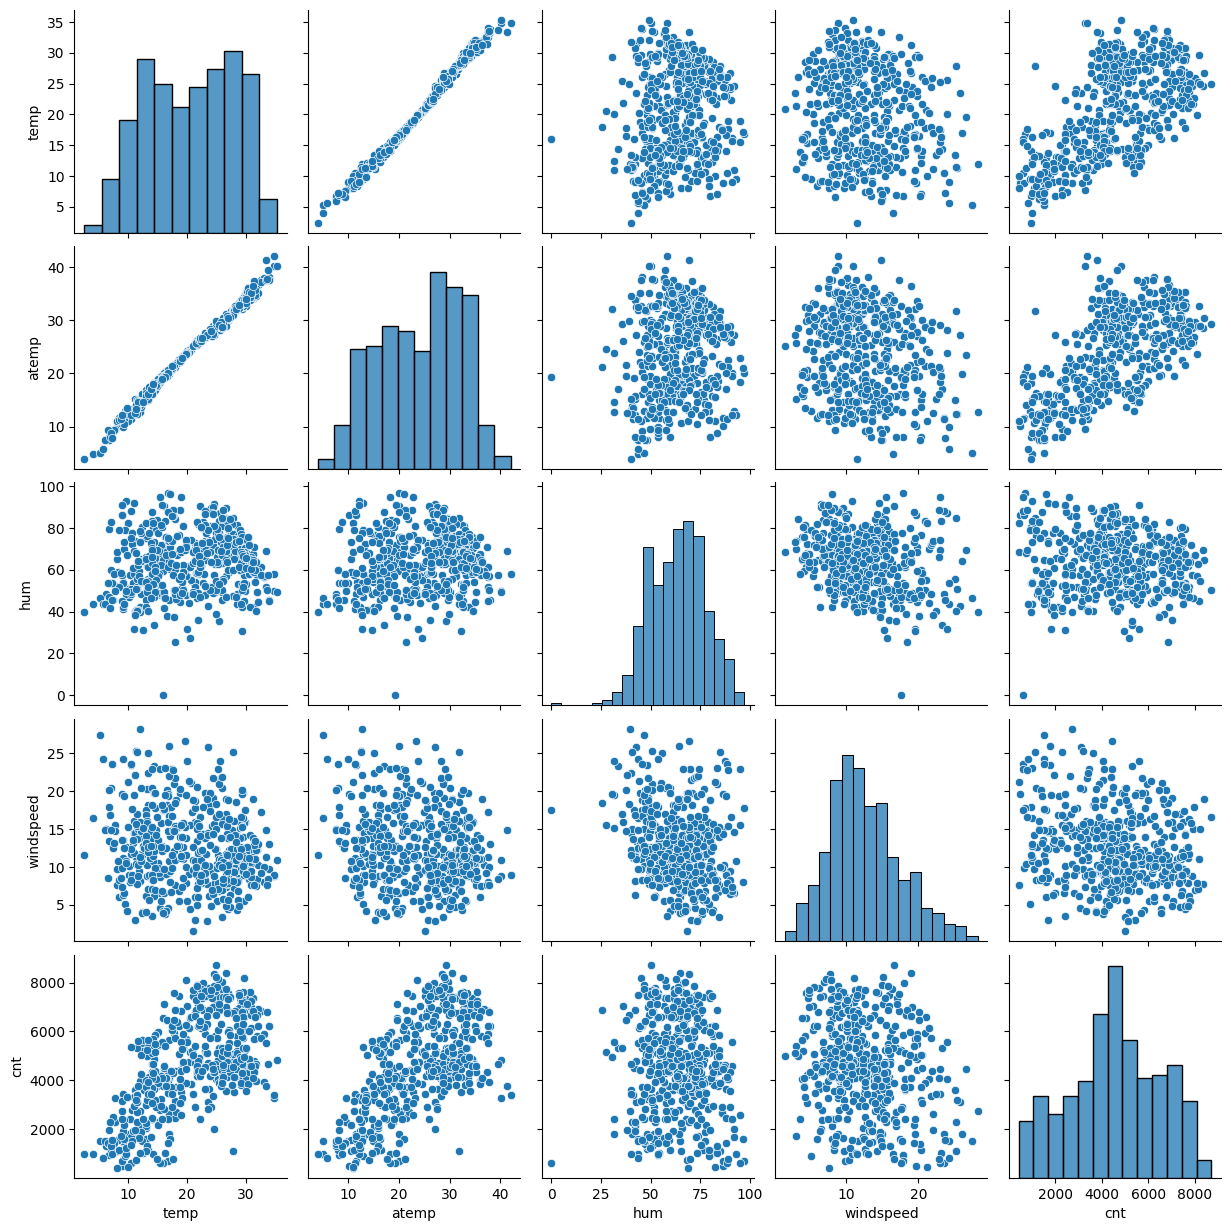

In [120]:
# numerical variables
df_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num)
plt.show()


### Obervation

1.   The Pair-Plot shows us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'



# Categorical Variables

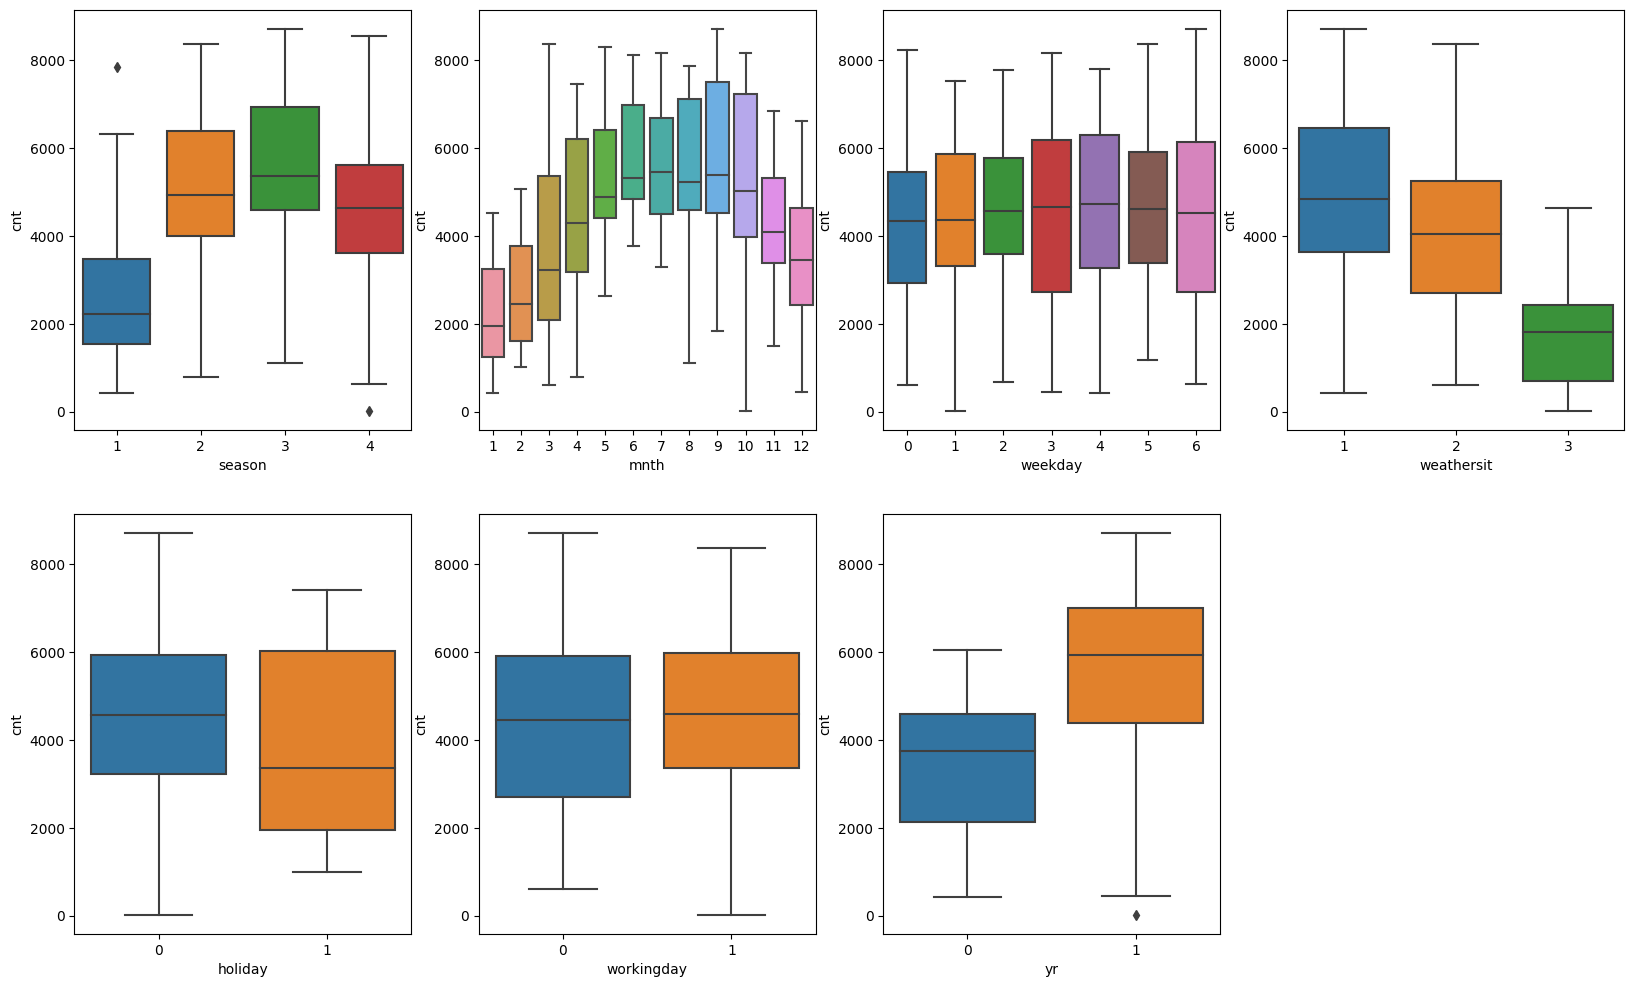

In [121]:
# Visualizing the categorical columns of duplicated dataset dup_df 
# To assess the relationship between the predictor variable and the target variable
# It is necessary to examine their correlation or association.

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = dup_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = dup_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = dup_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dup_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = dup_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dup_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = dup_df)
plt.show()

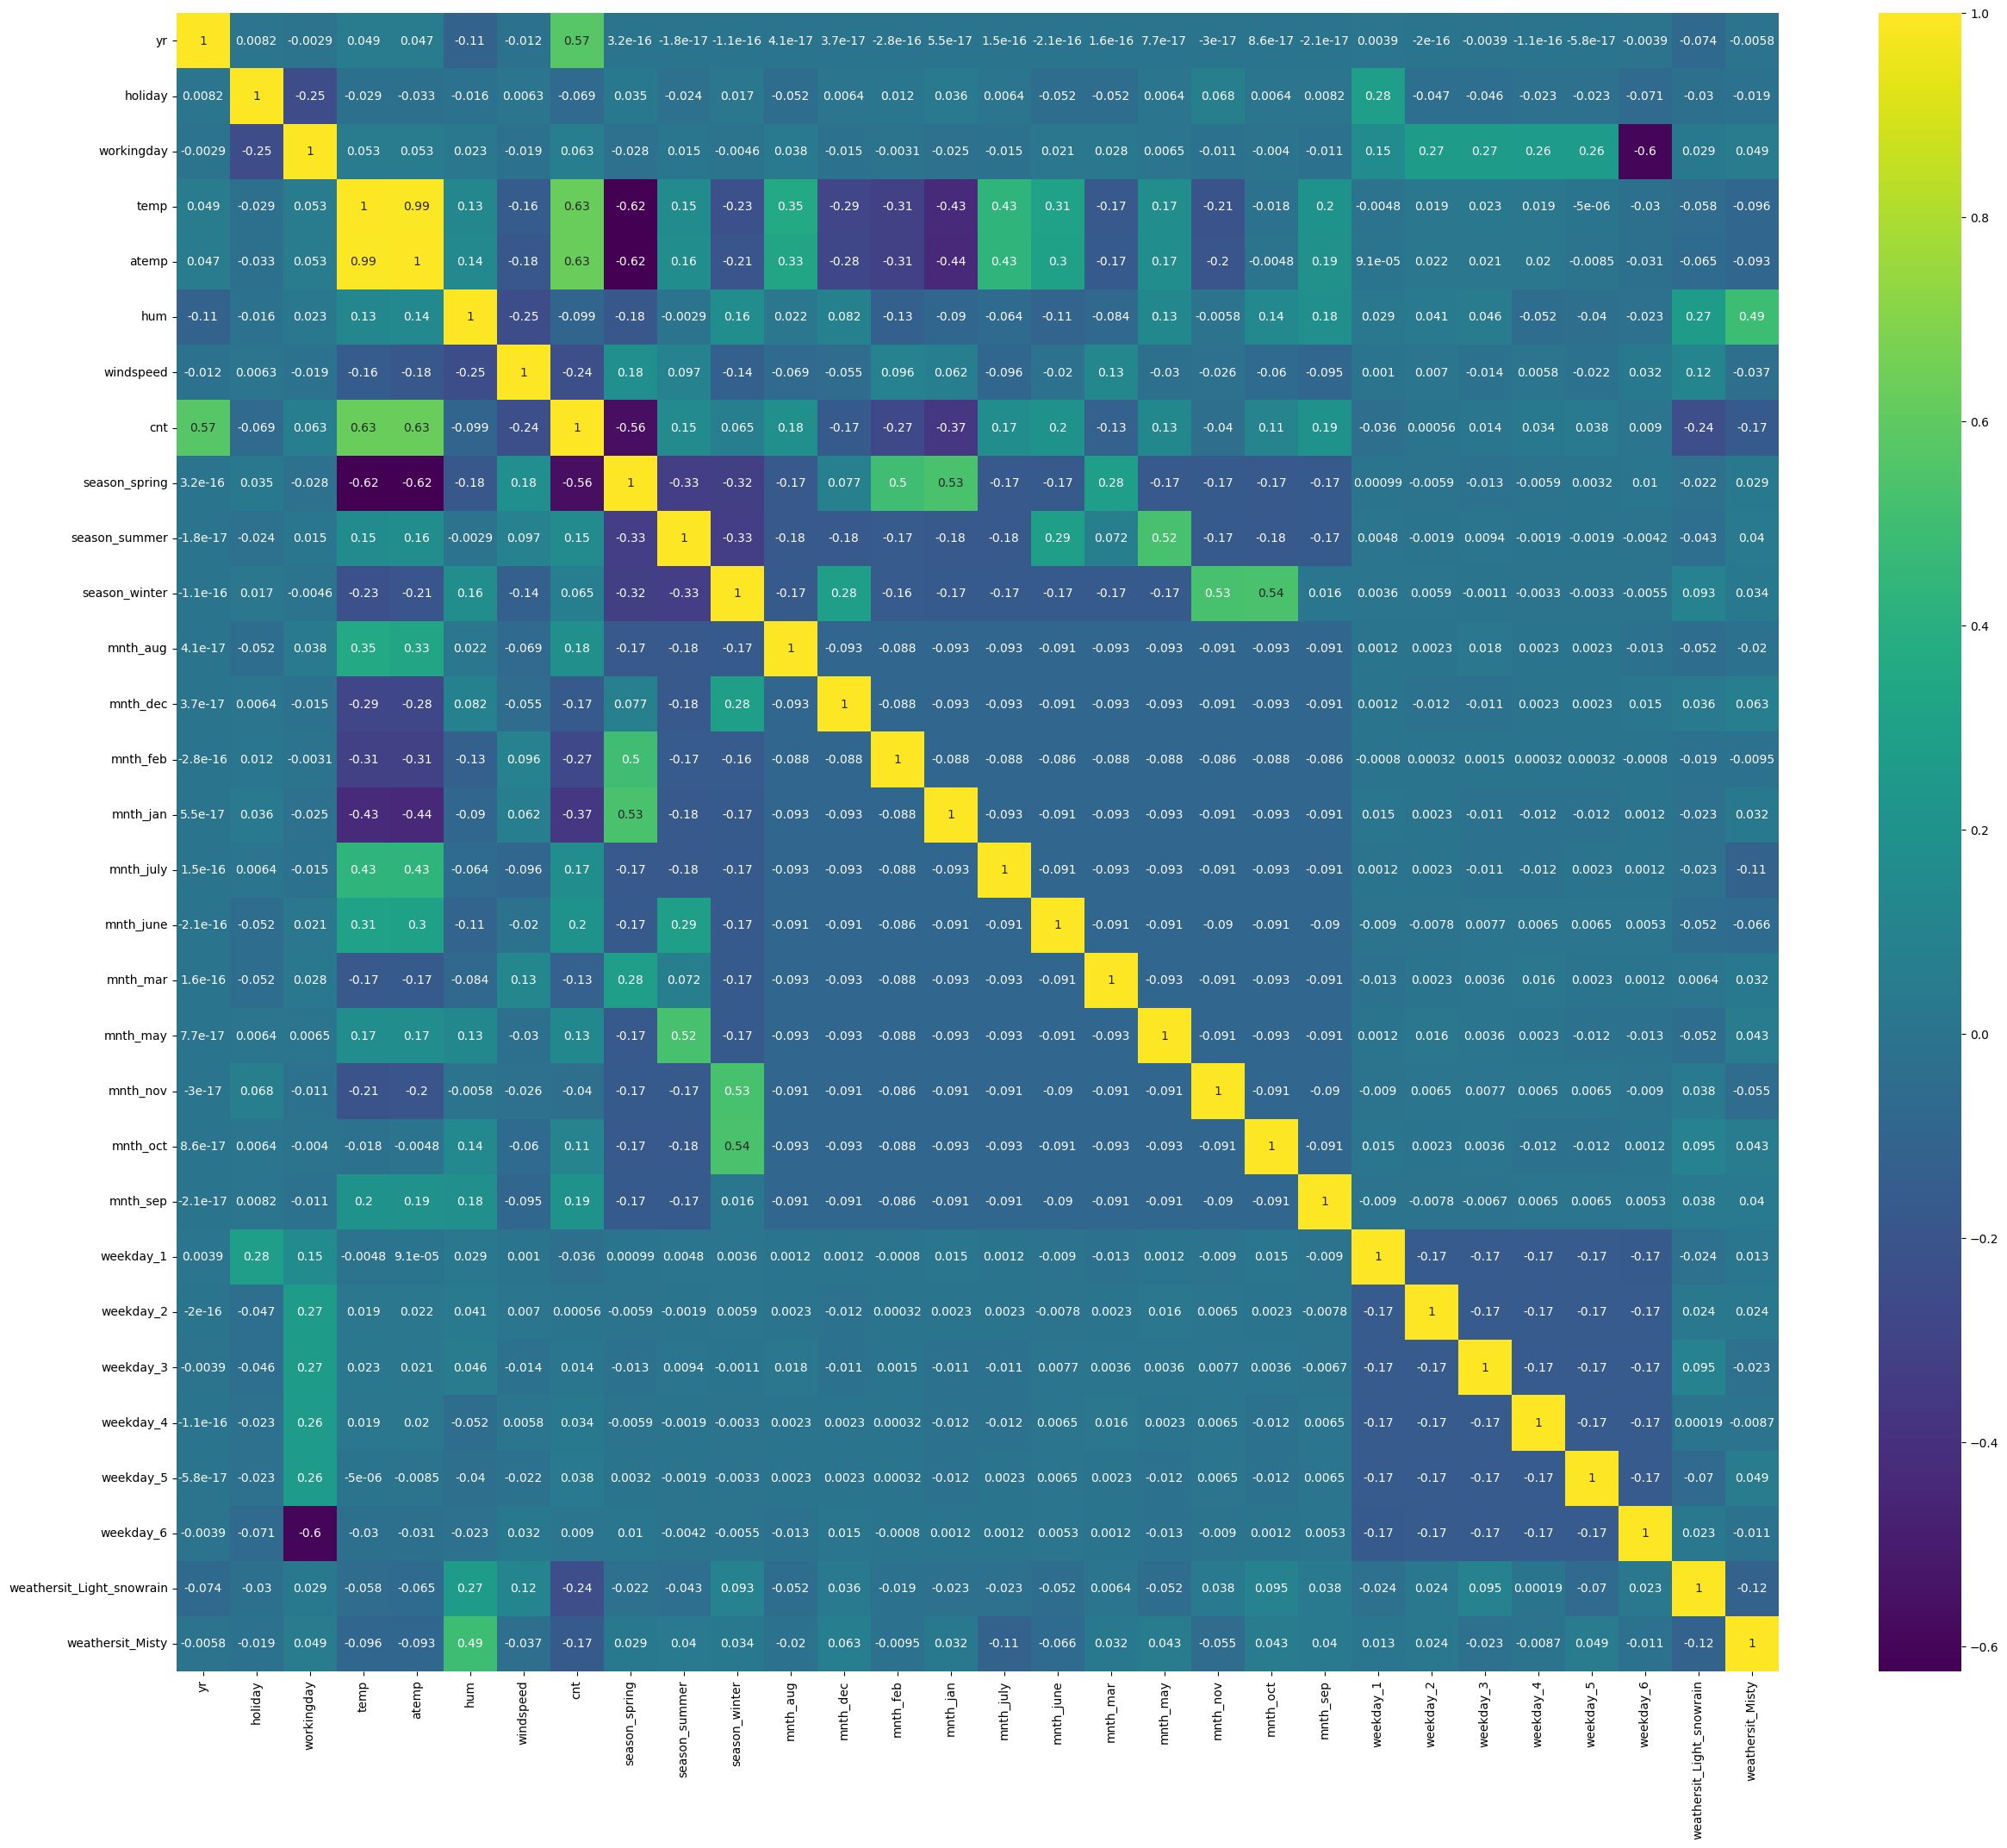

In [122]:
# Correlation Matrix
plt.figure(figsize = (30,25))
sns.heatmap(df.corr(), annot = True, cmap="viridis")
plt.show()

### Observation

1.   season: Season 3 has the highest number of bike bookings, indicating its significance as a predictor.
2. mnth: Months 5, 6, 7, 8, and 9 show a higher number of bookings, suggesting a trend and predictive potential.
3. weathersit: Weather situation 1 is associated with the majority of bookings, making it a relevant predictor.
4. holiday: The data is heavily biased towards non-holiday bookings, indicating it is not a strong predictor.
5. weekday: Bookings are relatively consistent across weekdays, with potential but uncertain predictive power.
6. workingday: Working days contribute significantly to bookings, making it a useful predictor.
7. yr: In year 2019 there were significantly more bookings than 2018.
8. The heatmap provides a clear visualization of the multicollinearity among variables, as well as their correlation with the target variable.


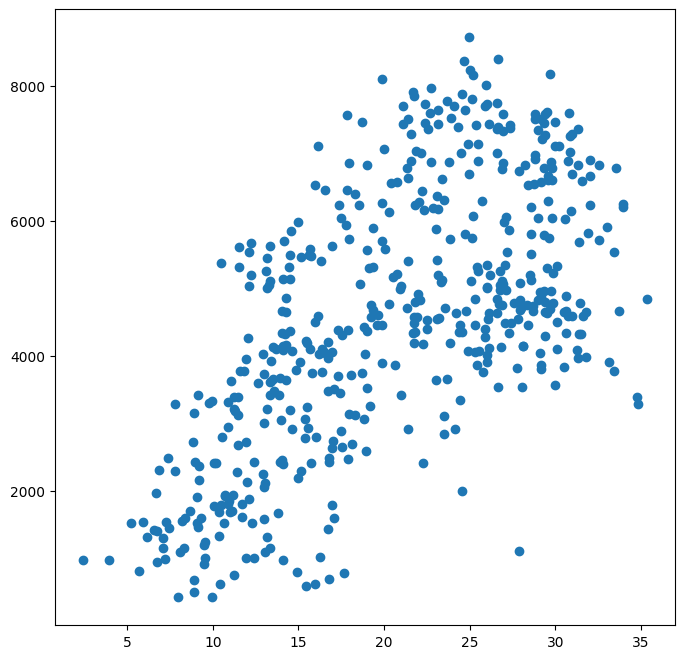

In [123]:
# To observe pattern, one of the correlations can be visualized using a scatter plot.
plt.figure(figsize=[8,8])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Using MinMaxScaler to Rescaling the features

In [124]:
scaler = MinMaxScaler()


In [125]:
# To standardize all numeric variables, the scaler() function should be applied.
df_num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[df_num_vars] = scaler.fit_transform(df_train[df_num_vars])

In [126]:
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_snowrain,weathersit_Misty
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.605336,0,0,...,0,0,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.609320,0,0,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.554026,0,1,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.088253,1,0,...,0,0,0,1,0,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.862127,0,0,...,1,0,0,0,1,0,0,0,0,1


In [127]:
df_train.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.521569,0.027451,0.668627,0.551091,0.526680,0.653801,0.414566,0.498206,0.231373,0.256863,...,0.090196,0.090196,0.149020,0.131373,0.139216,0.147059,0.129412,0.150980,0.029412,0.345098
std,0.500025,0.163554,0.471169,0.227401,0.213153,0.143542,0.185671,0.233905,0.422124,0.437332,...,0.286744,0.286744,0.356457,0.338139,0.346511,0.354512,0.335985,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Building Linear Regression Model

In [128]:
# For model building, the data needs to be divided into X and Y sets.
y_train = df_train.pop('cnt')
X_train = df_train

In [129]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [130]:
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [131]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 8),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 15),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 9),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 10),
 ('mnth_sep', False, 6),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 7),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', False, 4)]

In [132]:
# Selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_july', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weathersit_Light_snowrain'],
      dtype='object')


In [133]:
# Checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_6', 'weathersit_Misty'],
      dtype='object')

In [134]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using STATS MODEL

In [135]:
# Checking VIF factor
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [136]:
calculateVIF(X_train_rfe)


,Features,VIF
1,holiday,inf
2,workingday,inf
9,weekday_1,inf
10,weekday_2,inf
11,weekday_3,inf
12,weekday_4,inf
13,weekday_5,inf
4,hum,17.16
3,atemp,14.99
5,windspeed,4.89


In [137]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [138]:
lr1.params


const                        0.331920
yr                           0.234088
holiday                     -0.049503
workingday                   0.020192
atemp                        0.561683
hum                         -0.270432
windspeed                   -0.129534
season_spring               -0.137246
season_winter                0.059327
mnth_july                   -0.080070
weekday_1                   -0.016338
weekday_2                   -0.018617
weekday_3                    0.004163
weekday_4                   -0.004408
weekday_5                    0.005889
weathersit_Light_snowrain   -0.164442
dtype: float64

In [139]:
# Summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          2.00e-173
Time:                        11:42:32   Log-Likelihood:                 453.64
No. Observations:                 510   AIC:                            -877.3
Df Residuals:                     495   BIC:                            -813.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [140]:
# Removing the variable 'holiday' based on its High P value and High VIF
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)



In [141]:
#VIF Check
calculateVIF(X_train_new)

,Features,VIF
1,workingday,27.89
3,hum,17.16
2,atemp,14.99
11,weekday_4,7.39
10,weekday_3,7.24
9,weekday_2,6.72
12,weekday_5,6.63
8,weekday_1,6.01
4,windspeed,4.89
5,season_spring,2.51


In [142]:
# Building 2nd linear regression model as the VIF is still high
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          2.00e-173
Time:                        11:42:49   Log-Likelihood:                 453.64
No. Observations:                 510   AIC:                            -877.3
Df Residuals:                     495   BIC:                            -813.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [143]:
# Drop 'workingday' variable as it has high VIF value
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,hum,17.16
1,atemp,14.98
3,windspeed,4.89
4,season_spring,2.50
0,yr,2.09
5,season_winter,1.91
7,weekday_1,1.49
9,weekday_3,1.48
10,weekday_4,1.47
8,weekday_2,1.44


VIF still has high values, lets optimize it more

In [144]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     170.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          2.68e-173
Time:                        11:43:24   Log-Likelihood:                 450.66
No. Observations:                 510   AIC:                            -873.3
Df Residuals:                     496   BIC:                            -814.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [145]:
# We can drop hum variable as it has high VIF value
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
1,atemp,6.05
2,windspeed,4.79
0,yr,2.09
3,season_spring,1.74
6,weekday_1,1.48
9,weekday_4,1.47
8,weekday_3,1.46
4,season_winter,1.42
7,weekday_2,1.42
10,weekday_5,1.42


In [179]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     117.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.86e-130
Time:                        12:12:51   Log-Likelihood:                 343.63
No. Observations:                 510   AIC:                            -663.3
Df Residuals:                     498   BIC:                            -612.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [180]:
# We can drop 'atemp' variable as it has high VIF value
X_train_new = X_train_new.drop(['atemp'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

KeyError: ignored

VIF value now seems to be good as it is below 5. We can consider the above model i.e lr_4 model, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

The F-Statistics value of 160.06 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

In [175]:
# Checking the parameters and their coefficient values
lr_4.params


const                        0.154430
yr                           0.240324
atemp                        0.522004
windspeed                   -0.076475
season_spring               -0.142036
season_winter                0.047304
mnth_july                   -0.062582
weekday_1                   -0.008162
weekday_2                   -0.005545
weekday_3                    0.023549
weekday_4                    0.027161
weekday_5                    0.025805
weathersit_Light_snowrain   -0.227939
dtype: float64

## Residual Analysis of the train data and validation

In [149]:
X_train_lm_4

,const,yr,atemp,windspeed,season_spring,season_winter,mnth_july,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weathersit_Light_snowrain
683,1.0,1,0.322150,0.327101,0,1,0,0,0,0,1,0,0
645,1.0,1,0.404998,0.419004,0,1,0,1,0,0,0,0,0
163,1.0,0,0.685963,0.708724,0,0,0,1,0,0,0,0,0
360,1.0,0,0.326273,0.415925,1,0,0,0,1,0,0,0,0
640,1.0,1,0.682653,0.110593,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,1.0,1,0.367719,0.255447,0,1,0,0,0,0,0,0,0
71,1.0,0,0.395131,0.621696,1,0,0,0,0,0,0,0,0
106,1.0,0,0.481247,0.704080,0,0,0,0,0,0,0,0,0
270,1.0,0,0.651183,0.316186,0,1,0,0,0,1,0,0,0


In [150]:
y_train_pred = lr_4.predict(X_train_lm_4)

Text(0.5, 0, 'Errors')

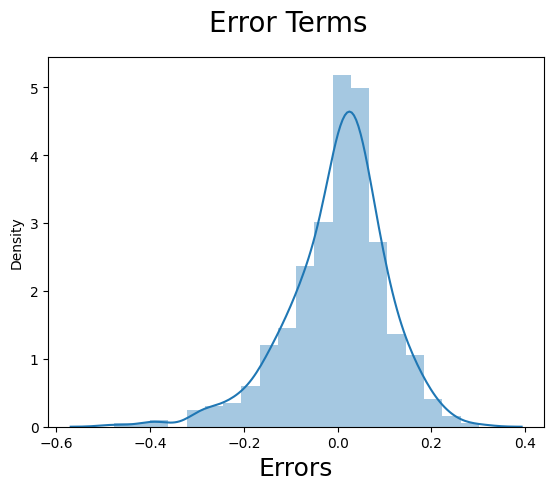

In [151]:
#Normality of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are normally distributed with mean zero (not X, Y). From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.


### Multicollinearity


In [152]:
calculateVIF(X_train_new)


,Features,VIF
1,windspeed,3.15
0,yr,1.93
2,season_spring,1.48
3,season_winter,1.42
5,weekday_1,1.34
8,weekday_4,1.32
6,weekday_2,1.29
9,weekday_5,1.28
7,weekday_3,1.27
4,mnth_july,1.15


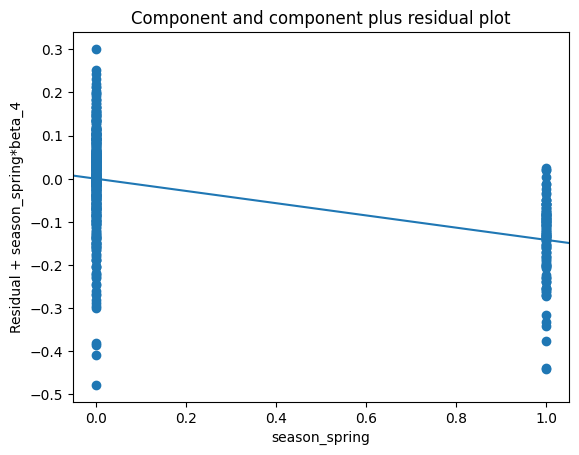

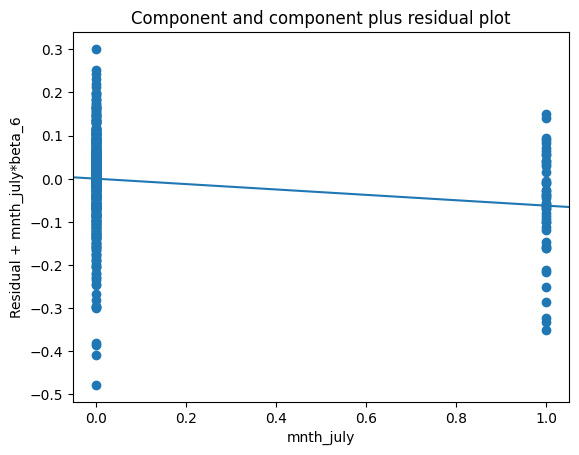

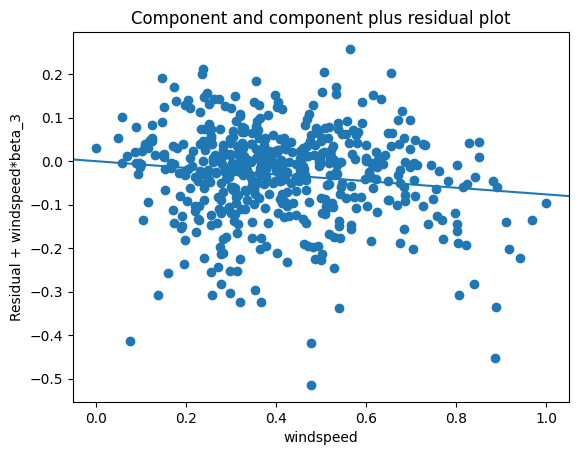

In [153]:
#There is a linear relationship between X and Y
sm.graphics.plot_ccpr(lr_4, 'season_spring')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'mnth_july')
plt.show()

sm.graphics.plot_ccpr(lr_4, 'windspeed')
plt.show()

## Making Predictions Using the Final Model

In [154]:
# Applying the scaling on the test sets
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [155]:
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_snowrain,weathersit_Misty
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0.848606,0,1,...,0,0,0,0,0,0,0,1,0,0
148,0,0,0,0.758058,0.704203,0.843709,0.479765,0.526017,0,1,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,...,1,0,0,0,0,0,0,0,0,0
355,0,0,1,0.453814,0.455552,0.780592,0.062325,0.318363,1,0,...,0,0,0,0,0,1,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0.833877,0,1,...,0,0,0,0,0,1,0,0,0,0


In [156]:
df_test.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.031963,0.716895,0.527468,0.501760,0.629546,0.435511,0.479553,0.283105,0.237443,...,0.073059,0.063927,0.132420,0.168950,0.141553,0.132420,0.173516,0.127854,0.027397,0.315068
std,0.498836,0.176306,0.451539,0.229936,0.215759,0.152584,0.212750,0.233091,0.451539,0.426491,...,0.260830,0.245183,0.339723,0.375566,0.349389,0.339723,0.379560,0.334692,0.163612,0.465607
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.726388,0.685028,0.735901,0.534288,0.644151,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [157]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 468 to 314
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         219 non-null    int64  
 1   holiday                    219 non-null    int64  
 2   workingday                 219 non-null    int64  
 3   temp                       219 non-null    float64
 4   atemp                      219 non-null    float64
 5   hum                        219 non-null    float64
 6   windspeed                  219 non-null    float64
 7   season_spring              219 non-null    uint8  
 8   season_summer              219 non-null    uint8  
 9   season_winter              219 non-null    uint8  
 10  mnth_aug                   219 non-null    uint8  
 11  mnth_dec                   219 non-null    uint8  
 12  mnth_feb                   219 non-null    uint8  
 13  mnth_jan                   219 non-null    uint8

In [173]:
#Selecting the variables that were part of final model
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm_4 = sm.add_constant(X_test)
X_test_lm_4.shape

(219, 12)

In [181]:
y_pred = lr_4.predict(X_test_lm_4)


## Model Evaluation

Text(0, 0.5, 'y_pred')

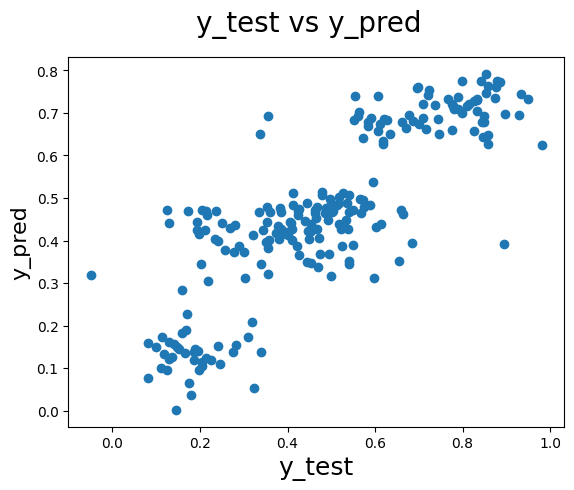

In [183]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

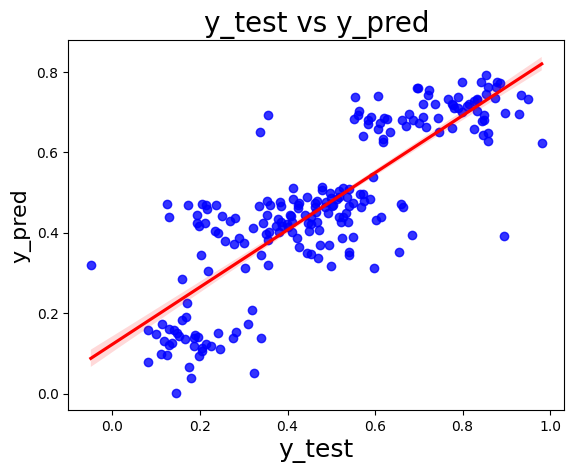

In [184]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Demand of bikes depend on year, temp, windspeed, sep, Light_snowrain, Misty, spring, and summer and july month